## Задание 1

In [28]:
import numpy as np
with np . load ( 'data_7_1.npz') as data :
    x1 , y1 = data [ 'x1'] , data [ 'y1']
    x4 , y4 = data ['x4'] , data ['y4']

In [7]:
print(x1, y1)

[   0.  349.  698. 1047. 1396. 1746. 2095. 2444. 2793. 3142. 3492. 4190.
 4889. 5587. 6285. 6984. 7682. 8381. 9079. 9778.] [-0.99       -0.98961838 -0.98749461 -0.98666501 -0.98641613 -0.98628339
 -0.98611747 -0.98610088 -0.98583541 -0.98583541 -0.98556994 -0.91289696
 -0.1005857  -0.09056413 -0.08454123 -0.08233449 -0.08079144 -0.07750622
 -0.07218019 -0.05817654]


In [8]:
def lagr_int(x1, y1, x):  ## Lagrange Interpolator
    res = 0
    for i in range(len(x1)):
        L = 1
        for j in range(len(x1)):
            if i!=j:
                L = L * (x - x1[j])/(x1[i] - x1[j])
        res += L * (y1[i])
    return res

In [11]:
cs = inter.CubicSpline(x1 ,y1)

In [10]:
from scipy import interpolate as inter
pc_int = inter.PchipInterpolator(x1, y1)

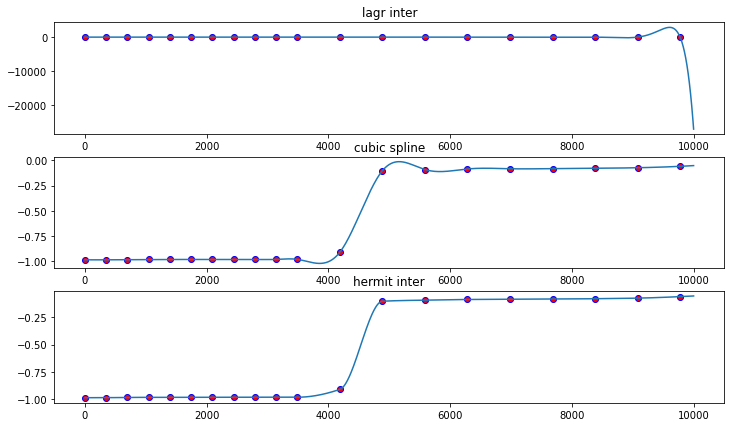

In [27]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (12, 7))
xx = np.linspace(0, 10000, 1000)
ax3.plot(xx, pc_int(xx))
ax3.set_title("hermit inter")
ax2.plot(xx, cs(xx))
ax2.set_title("cubic spline")
ax1.plot(xx, lagr_int(x1, y1, xx))
ax1.set_title("lagr inter")
ax1.scatter(x=x1, y=y1, marker='o', c='r', edgecolor='b')
ax2.scatter(x=x1, y=y1, marker='o', c='r', edgecolor='b')
ax3.scatter(x=x1, y=y1, marker='o', c='r', edgecolor='b')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Задание 2

<ipython-input-30-fd6f97169207>:10: RankWarning: Polyfit may be poorly conditioned
  plott(16)


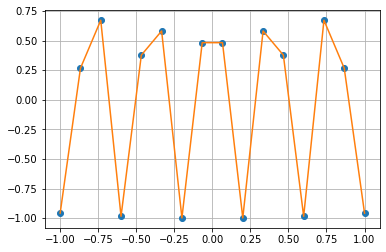

<ipython-input-30-fd6f97169207>:11: RankWarning: Polyfit may be poorly conditioned
  plott(32)


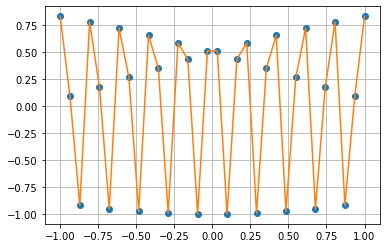

<ipython-input-30-fd6f97169207>:12: RankWarning: Polyfit may be poorly conditioned
  plott(64)


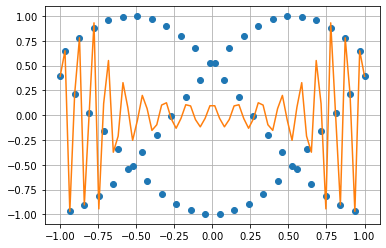

In [30]:
def plott(n):
    x = np.linspace(-1, 1, n)
    y = np.cos(n*x)
    P = np.polyfit(x, y, n)
    plt.plot(x,y,'o')
    plt.plot(x, np.polyval(P,x))
    plt.grid(True)
    plt.show()
plott(16)
plott(32)
plott(64)

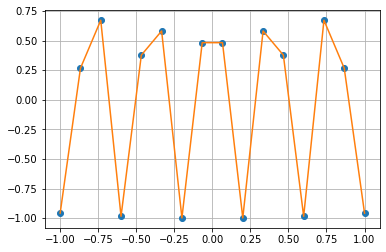

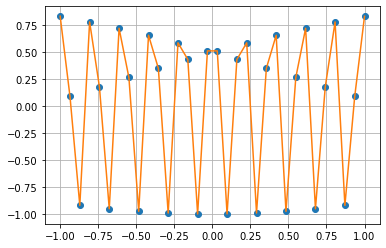

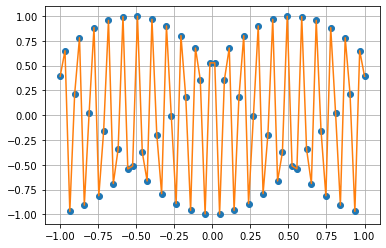

In [31]:
def plott_(n):
    x = np.linspace(-1, 1, n)
    y = np.cos(n*x)
    plt.plot(x,y,'o')
    plt.plot(x, lagr_int(x, y, x))
    plt.grid(True)
    plt.show()
plott_(16)
plott_(32)
plott_(64)

## Задание 3

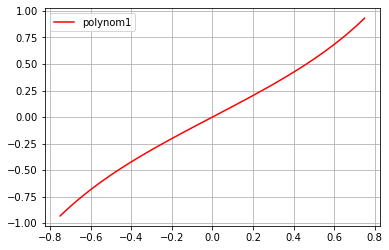

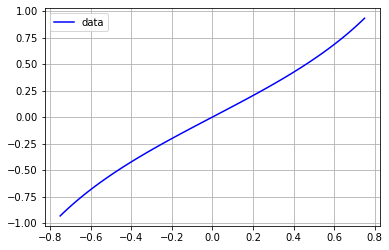

In [121]:
from scipy.optimize import curve_fit
def func1(x, p0, p1, p2, p3, p4, p5):
    return p0+p1*x+p2*(x**2)+p3*(x**3)+p4*(x**4)+p5*(x**5)
popt, pcov = curve_fit(func1, x4, y4)
plt.plot(x4,func1(x4, *popt),'r-',label='polynom1')
plt.grid(True)
plt.legend()
plt.show()
plt.plot(x4, y4, 'b-', label='data')
plt.grid(True)
plt.legend()
plt.show()

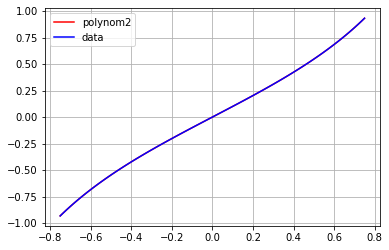

In [116]:
from scipy.optimize import curve_fit
def func2(x, p0, p1, p2, p3, q1, q2):
    return (p0+p1*x+p2*(x**2)+p3*(x**3))/(1+q1*x+q2*(x**2))
popt1, pcov1 = curve_fit(func2, x4, y4)
plt.plot(x4,func2(x4, *popt1),'r-',label='polynom2')
plt.plot(x4, y4, 'b-', label='data')
plt.legend()
plt.grid(True)
plt.show()

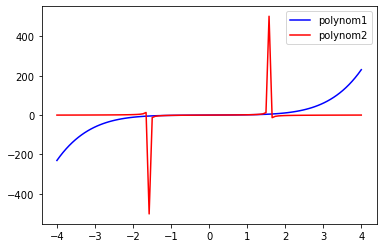

In [123]:
xx = np.linspace(-4, 4, 100)
plt.plot(xx,func1(xx, *popt),'b-',label='polynom1')
plt.plot(xx,func2(xx, *popt1),'r-',label='polynom2')
plt.legend()

## Задание 4

In [103]:
class spline_cub:
    def __init__(self, x, y):
        self.x = np.asarray(x, dtype=float)
        self.y = np.asarray(y, dtype=float)
        
        n = len(x) - 1
        self.n = n
        A = np.zeros((n, n))
        h = np.zeros(n+1)
        for i in range(1,n+1):
            h[i] = x[i] - x[i-1]
        self.h = np.asarray(h, dtype=float)
        
        
        for i in range(2,n):
            A[i-1, i-2] = h[i]
            A[i-1, i-1] = 2 * (h[i+1] + h[i])
            A[i-1, i ] = h[i+1]
        A[0, 0] = 2*(h[2] + h[1])
        A[0, 1] = h[2]
        A[0, n-1] = h[1]
        A[n-1, 0] = h[1]
        A[n-1, n - 2] = h[n]
        A[n-1, n-1] = 2 * (h[n] + h[1])
        b = np.zeros(n)
        for i in range(2, n):
            b[i-1] = 3 * ((y[i+1] - y[i])/h[i+1] - (y[i] - y[i-1]/h[i]))
        b[0] = 3 * ((y[1] - y[0])/h[1] - (y[0] - y[n])/h[n])
        b[n-1] = 3 * ((y[1] - y[n])/h[1] - (y[n] - y[n-1])/h[n])
        self.res = np.linalg.solve(A, b)
        C = np.zeros((n, n))
        C[0, 0] = self.y[1]
        C[1, 0] = h[1] * (2 * self.res[0] + self.res[n-1])/3 + (C[0, 0] - self.y[0])/h[1] 
        C[2, 0] = self.res[0]
        C[3, 0] = (self.res[0] - self.res[n-1])/(3 * h[1])
        for i in range(1,n-1):
            C[0, i] = y[i+1]
            C[1, i] = h[i+1] * (2 * self.res[i] + self.res[i-1])/3 + (C[0, i] - y[i])/h[i+1] 
            C[2, i] = self.res[i]
            C[3, i] = (self.res[i] - self.res[i-1])/(3 * h[i+1])
        C[0, n-1] = y[n]
        C[1, n-1] = h[n] * (2 * self.res[n-1] + self.res[n-2])/3 + (C[0, n-1] - y[n-1])/h[n] 
        C[2, n-1] = self.res[n-1]
        C[3, n-1] = (self.res[n-1] - self.res[n-2])/(3 * h[n])
        self.C = np.asarray(C, dtype=float)
        
        
    def __call__(self, x0):
        for i in range(0, self.n):
            if x0 >= self.x[i] and x0 < self.x[i + 1]:
                return self.C[0, i] + self.C[1, i] * (x0-self.x[i+1]) + self.C[2, i] * (x0-self.x[i+1])**2 + self.C[3, i] * (x0-self.x[i+1])**3

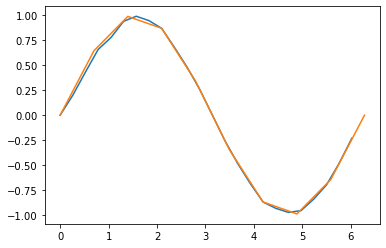

In [125]:
xx = np.linspace(0, 2 * np.pi, 10)
yy = np.sin(xx)
k = spline_cub(xx, yy)
a = np.linspace(0, 2*np.pi, 25)
b = np.zeros(25)
for i in range(25):
    b[i] = k(a[i])
plt.plot(a, b)
plt.plot(xx, np.sin(xx))
plt.show()

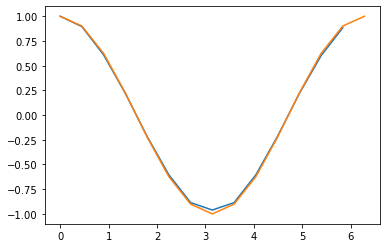

In [124]:
xx = np.linspace(0, 2 * np.pi, 10)
yy = np.cos(xx)
k = spline_cub(xx, yy)
a = np.linspace(0, 2*np.pi, 15)
b = np.zeros(15)
for i in range(15):
    b[i] = k(a[i])
plt.plot(a, b)
plt.plot(a, np.cos(a))
plt.show()

## Задание 5

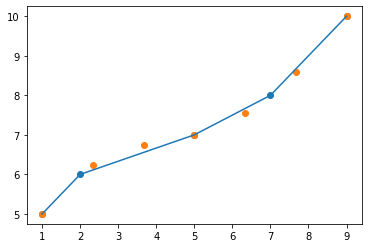

In [28]:
import matplotlib.pyplot as plt
import numpy as np
class Spline: 
    def __init__(self, a, b, c, d, x): 
        self.a = a 
        self.b = b 
        self.c = c 
        self.d = d 
        self.x = x 

    def BuildSpline(x, y, n): 
        splines = [Spline(0, 0, 0, 0, 0) for _ in range(0, n)] 
        for i in range(0, n): 
            splines[i].x = x[i] 
            splines[i].a = y[i] 

            splines[0].c = splines[n - 1].c = 0.0 

        
        alpha = np.zeros(n-1)  #прямой ход метода прогонки 
        beta = np.zeros(n-1)

        for i in range(1, n - 1): 
            hi = x[i] - x[i - 1] 
            hi1 = x[i + 1] - x[i] 
            A = hi 
            C = 2.0 * (hi + hi1) 
            B = hi1 
            F = 6.0 * ((y[i + 1] - y[i]) / hi1 - (y[i] - y[i - 1]) / hi) 
            z = (A * alpha[i - 1] + C) 
            alpha[i] = -B / z 
            beta[i] = (F - A * beta[i - 1]) / z 

        for i in range(n - 2, 0, -1): 
            splines[i].c = alpha[i] * splines[i + 1].c + beta[i] #обратный ход метода прогонки 

        # По известным коэффициентам c[i] находим значения b[i] и d[i] 
        for i in range(n - 1, 0, -1): 
            hi = x[i] - x[i - 1] 
            splines[i].d = (splines[i].c - splines[i - 1].c) / hi 
            splines[i].b = hi * (2.0 * splines[i].c + splines[i - 1].c) / 6.0 + (y[i] - y[i - 1]) / hi 
        return splines 

    
    def Interpolate(splines, x): 
            if not splines: 
                return None 
            n = len(splines) 
            s = Spline(0, 0, 0, 0, 0) 
            if x <= splines[0].x:  
                s = splines[0] 
            elif x >= splines[n - 1].x: 
                s = splines[n - 1] 
            else: 
                i = 0 
                j = n - 1 
                while i + 1 < j: 
                    k = i + (j - i) // 2 
                    if x <= splines[k].x: 
                        j = k 
                    else: 
                        i = k 
                        s = splines[j] 

            h = x - s.x 
            return s.a + (s.b + (s.c / 2.0 + s.d * h / 6.0) * h) * h; 


x = [1, 2, 5, 7, 9] 
y = [5, 6, 7, 8, 10] 
new_x = np.linspace(1, 9, 7) 

spline = Spline.BuildSpline(x, y, len(x)) 

plt.scatter(x, y) 
plt.plot(x, y) 
y = np.zeros(7)
for i in range(len(y)):
    y[i] = Spline.Interpolate(spline, new_x[i])
plt.scatter(new_x, y) 
plt.show()